In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime


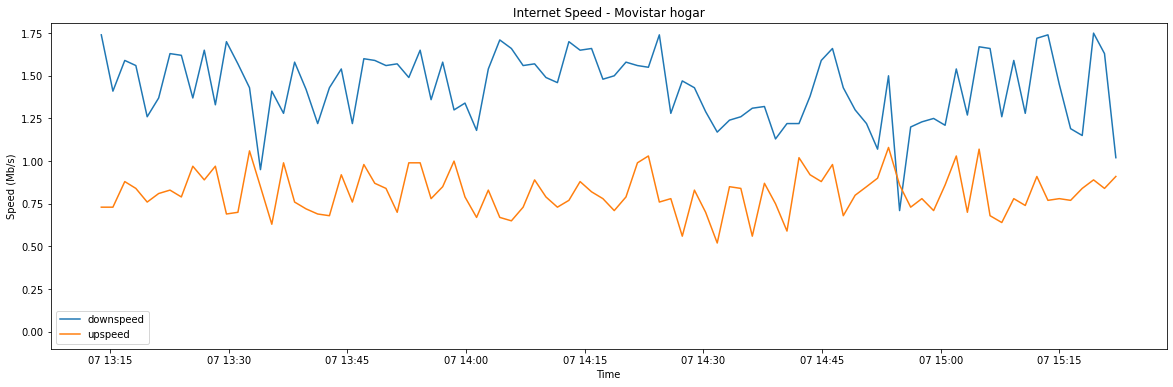

In [2]:
# Data
df_house = pd.read_csv('speedtest_house.csv')
# time to datetime and only keep hours, minutes and seconds
df_house['time'] = pd.to_datetime(pd.to_datetime(df_house['time']).dt.strftime('%H:%M:%S'))


# PLot upspeed and downspeed, with time in the x axis
plt.figure(figsize=(20,6))
plt.plot(df_house['time'], df_house['downspeed'], label='downspeed')
plt.plot(df_house['time'], df_house['upspeed'], label='upspeed')
plt.legend()
# plt.xticks(rotation=90)
plt.ylim(-.1)
plt.xlabel('Time')
plt.ylabel('Speed (Mb/s)')
plt.title('Internet Speed - Movistar hogar')
plt.show()

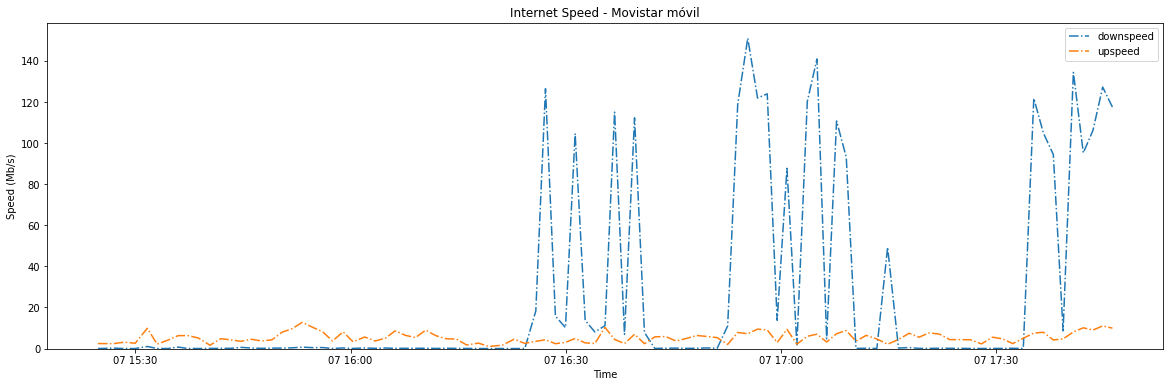

In [3]:
# Data
df_mobile_mov = pd.read_csv('speedtest_mobile_mov.csv')
# Time to datetime
df_mobile_mov['time'] = pd.to_datetime(pd.to_datetime(df_mobile_mov['time']).dt.strftime('%H:%M:%S'))

# PLot upspeed and downspeed, with time in the x axis
plt.figure(figsize=(20,6))
plt.plot(df_mobile_mov['time'], df_mobile_mov['downspeed'], '-.', label='downspeed')
plt.plot(df_mobile_mov['time'], df_mobile_mov['upspeed'], '-.', label='upspeed')
plt.legend()
# plt.xticks(rotation=90)
plt.ylim(-.1)
plt.xlabel('Time')
plt.ylabel('Speed (Mb/s)')
plt.title('Internet Speed - Movistar móvil')
plt.show()

In [4]:
df_mobile_mov.describe()

,downspeed,upspeed
count,99.000000,99.000000
mean,26.488687,5.396465
std,47.455193,2.591216
min,0.020000,1.030000
25%,0.100000,3.420000
50%,0.240000,4.840000
75%,13.780000,7.230000
max,151.070000,12.780000


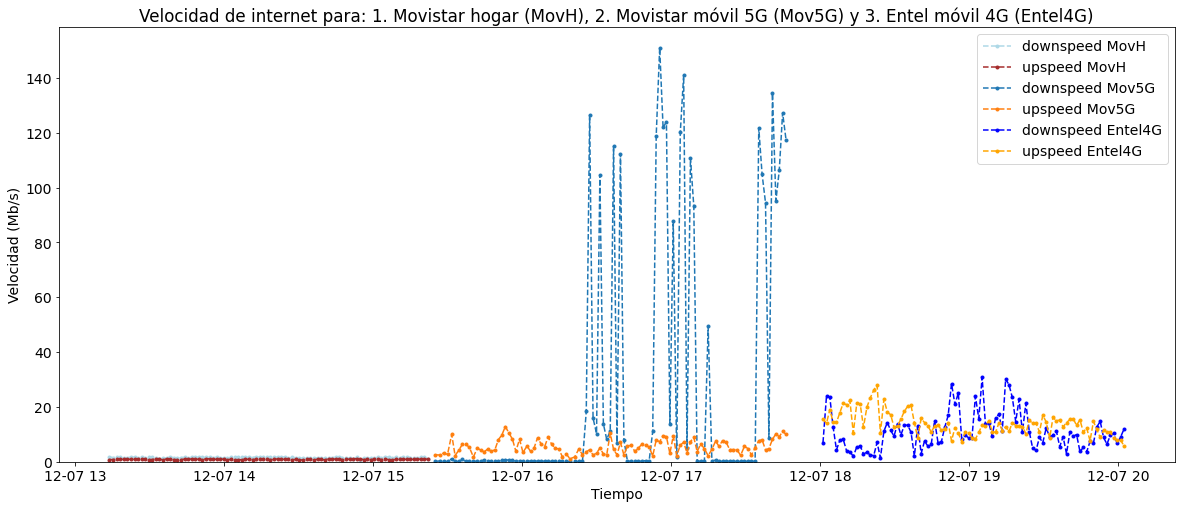

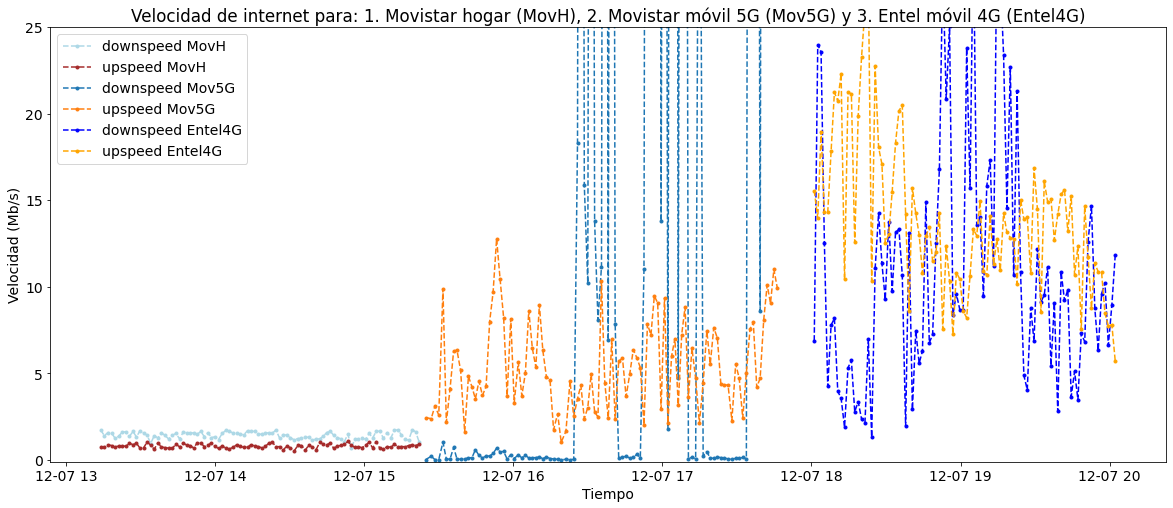

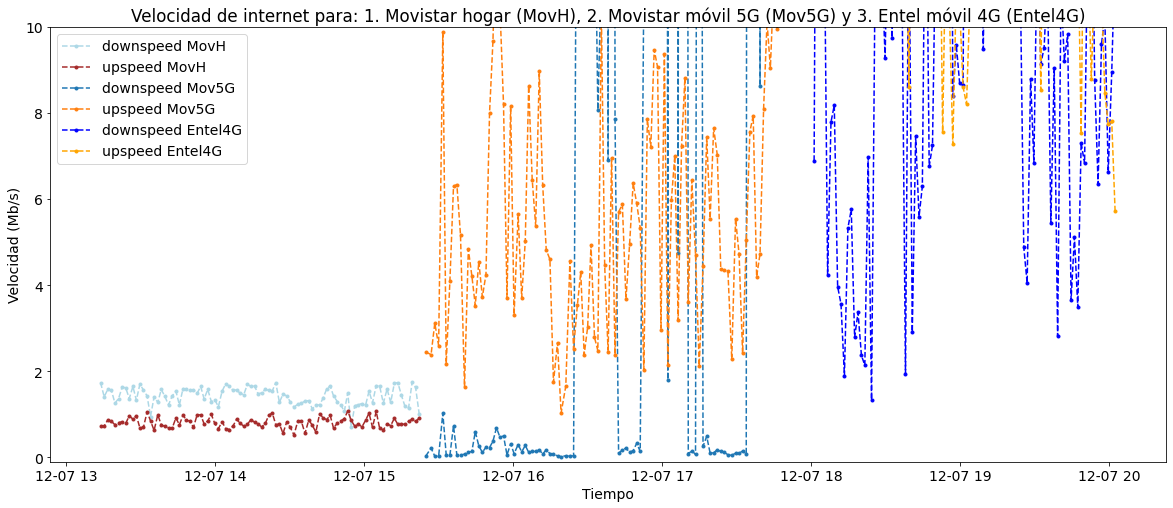

In [6]:
from time import sleep

# Data
df_mobile_entel = pd.read_csv('speedtest.csv')
# time to datetime
df_mobile_entel['time'] = pd.to_datetime(df_mobile_entel['time'])

font = {'family' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

for lim in [None, 25, 10]:

    # PLot upspeed and downspeed, with time in the x axis
    plt.figure(figsize=(20,8))
    plt.plot(df_house['time'], df_house['downspeed'], '.--', c='lightblue', label='downspeed MovH')
    plt.plot(df_house['time'], df_house['upspeed'], '.--', c='brown', label='upspeed MovH')
    plt.plot(df_mobile_mov['time'], df_mobile_mov['downspeed'], '.--', label='downspeed Mov5G')
    plt.plot(df_mobile_mov['time'], df_mobile_mov['upspeed'], '.--', label='upspeed Mov5G')
    plt.plot(df_mobile_entel['time'], df_mobile_entel['downspeed'], '.--', c='blue', label='downspeed Entel4G')
    plt.plot(df_mobile_entel['time'], df_mobile_entel['upspeed'], '.--', c='orange', label='upspeed Entel4G')
    plt.legend()
    # plt.xticks(rotation=90)
    plt.ylim(-.1,lim)
    plt.xlabel('Tiempo')
    plt.ylabel('Velocidad (Mb/s)')
    plt.title('Velocidad de internet para: 1. Movistar hogar (MovH), 2. Movistar móvil 5G (Mov5G) y 3. Entel móvil 4G (Entel4G)')
    plt.savefig(f'./plots/plot_{lim}.pdf')
    plt.show()


In [28]:
# Add 3 databases in 1 dataframe, but segmented by each one
df = pd.concat([df_house.describe(), df_mobile_mov.describe(), df_mobile_entel.describe()], keys=['MovH', 'Movistar móvil', 'Entel móvil'], axis=1)
# Translate describe statistics to spanish
df = df.T.rename(columns={'count':'n. muestras', 'mean':'media', 'std':'desv_est', 'min':'min', '25%':'25%', '50%':'50%', '75%':'75%', 'max':'max'})
# Transpose, round 2 and to_latex
print(df.round(2).T.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{2}{l}{Movistar hogar} & \multicolumn{2}{l}{Movistar móvil} & \multicolumn{2}{l}{Entel móvil} \\
{} &      downspeed & upspeed &      downspeed & upspeed &   downspeed & upspeed \\
\midrule
n. muestras &          90.00 &   90.00 &          99.00 &   99.00 &       90.00 &   90.00 \\
media       &           1.43 &    0.81 &          26.49 &    5.40 &       10.91 &   13.85 \\
desv\_est    &           0.21 &    0.12 &          47.46 &    2.59 &        6.85 &    4.33 \\
min         &           0.71 &    0.52 &           0.02 &    1.03 &        1.34 &    5.72 \\
25\%         &           1.27 &    0.73 &           0.10 &    3.42 &        6.42 &   10.82 \\
50\%         &           1.46 &    0.80 &           0.24 &    4.84 &        9.50 &   13.17 \\
75\%         &           1.59 &    0.89 &          13.78 &    7.23 &       13.50 &   15.44 \\
max         &           1.75 &    1.08 &         151.07 &   12.78 &       30.74 &   27.89 \\
\bottomrule

/var/folders/xb/5tz2d5f95l1d2jgbk5pm7yxw0000gn/T/ipykernel_78915/4286948586.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.round(2).T.to_latex())
